# Aula 02 - KNN - Exercícios

## Exercício 1

Utilizando o dataset breast_cancer_train.csv, desenvolva um modelo KNN (utilizando o sklearn) com o objetivo de prever se o resultado de uma biópsia indica a presença de câncer malígno. Procure fazer com que o seu o modelo não apresente **overfitting** e maximize a acurácia.

Ao final, reporte:

1 - A acurácia, precisão e recall do seu modelo na base utilizada para treino e validação    
2 - A acurácia, precisão e recall do seu modelo na base breast_cancer_test.csv  
3 - O K escolhido    
4 - Qual é a variável mais importante no processo de decisão? Você pode usar uma árvore para responder      

In [1]:
import pandas as pd

In [3]:
df_cancer_train = pd.read_csv('breast_cancer_train.csv')
df_cancer_test = pd.read_csv('breast_cancer_test.csv')

In [4]:
df_cancer_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,857156,B,13.49,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,...,15.15,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
1,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.49,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,88330202,M,17.46,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,...,22.51,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496
3,88203002,B,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
4,892189,M,11.76,18.14,75.00,431.1,0.09968,0.05914,0.026850,0.035150,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915


In [5]:
df_cancer_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 455 entries, 0 to 454
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       455 non-null    int64  
 1   diagnosis                455 non-null    object 
 2   radius_mean              455 non-null    float64
 3   texture_mean             455 non-null    float64
 4   perimeter_mean           455 non-null    float64
 5   area_mean                455 non-null    float64
 6   smoothness_mean          455 non-null    float64
 7   compactness_mean         455 non-null    float64
 8   concavity_mean           455 non-null    float64
 9   concave points_mean      455 non-null    float64
 10  symmetry_mean            455 non-null    float64
 11  fractal_dimension_mean   455 non-null    float64
 12  radius_se                455 non-null    float64
 13  texture_se               455 non-null    float64
 14  perimeter_se             4

In [6]:
df_cancer_train['diagnosis'] = df_cancer_train['diagnosis'].map({'M': 1, 'B': 0})

df_cancer_train.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,857156,0,13.49,22.30,86.91,561.0,0.08752,0.07698,0.047510,0.033840,...,15.15,31.82,99.00,698.8,0.11620,0.17110,0.22820,0.12820,0.2871,0.06917
1,844981,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.49,30.73,106.20,739.3,0.17030,0.54010,0.53900,0.20600,0.4378,0.10720
2,88330202,1,17.46,39.28,113.40,920.6,0.09812,0.12980,0.141700,0.088110,...,22.51,44.87,141.20,1408.0,0.13650,0.37350,0.32410,0.20660,0.2853,0.08496
3,88203002,0,11.22,33.81,70.79,386.8,0.07780,0.03574,0.004967,0.006434,...,12.36,41.78,78.44,470.9,0.09994,0.06885,0.02318,0.03002,0.2911,0.07307
4,892189,1,11.76,18.14,75.00,431.1,0.09968,0.05914,0.026850,0.035150,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.06120,0.07160,0.1978,0.06915


In [7]:
X = df_cancer_train.drop(['id', 'diagnosis'], axis=1)
y = df_cancer_train['diagnosis']

print(X.shape, y.shape)

(455, 30) (455,)


In [8]:
# Hold out

from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=12)

print(X_train.shape, y_train.shape)
print(X_valid.shape, y_valid.shape)

(318, 30) (318,)
(137, 30) (137,)


In [9]:
from sklearn.neighbors import KNeighborsClassifier


##############

Treino k=1:
Acc: 1.00, Precision: 1.00, Recall: 1.00
Validação k=1:
Acc: 0.96, Precision: 0.94, Recall: 0.96

##############

Treino k=2:
Acc: 0.94, Precision: 1.00, Recall: 0.83
Validação k=2:
Acc: 0.93, Precision: 0.97, Recall: 0.81

##############

Treino k=3:
Acc: 0.94, Precision: 0.95, Recall: 0.89
Validação k=3:
Acc: 0.97, Precision: 0.96, Recall: 0.96

##############

Treino k=4:
Acc: 0.94, Precision: 0.97, Recall: 0.87
Validação k=4:
Acc: 0.96, Precision: 0.98, Recall: 0.90

##############

Treino k=5:
Acc: 0.94, Precision: 0.94, Recall: 0.90
Validação k=5:
Acc: 0.97, Precision: 0.98, Recall: 0.94

##############

Treino k=6:
Acc: 0.93, Precision: 0.97, Recall: 0.84
Validação k=6:
Acc: 0.96, Precision: 0.98, Recall: 0.92

##############

Treino k=7:
Acc: 0.94, Precision: 0.94, Recall: 0.90
Validação k=7:
Acc: 0.96, Precision: 0.98, Recall: 0.92

##############

Treino k=8:
Acc: 0.94, Precision: 0.96, Recall: 0.86
Validação k=8:
Acc: 0.95, Precision: 0.98, Recal

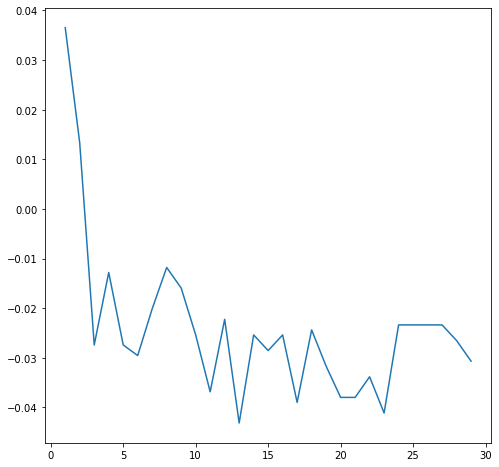

In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
from matplotlib import pyplot as plt

valores_k = []
taxa_overfit = []

for k in range(1, 30):
    modelo = KNeighborsClassifier(n_neighbors=k)
    modelo.fit(X_train, y_train)
    
    y_train_pred = modelo.predict(X_train)

    y_valid_pred = modelo.predict(X_valid)
    
    acc_train = accuracy_score(y_train, y_train_pred)
    prec_train = precision_score(y_train, y_train_pred)
    rec_train = recall_score(y_train, y_train_pred)

    acc_valid = accuracy_score(y_valid, y_valid_pred)
    prec_valid = precision_score(y_valid, y_valid_pred)
    rec_valid = recall_score(y_valid, y_valid_pred)
    
    valores_k.append(k)
    taxa_overfit.append(acc_train-acc_valid)

    print('\n##############\n')
    print(f'Treino k={k}:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
    print(f'Validação k={k}:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')
    
plt.figure(figsize=(8,8))

plt.plot(valores_k, taxa_overfit)

plt.show()

In [18]:
modelo = KNeighborsClassifier(n_neighbors=12)

modelo.fit(X_train, y_train)

y_train_pred = modelo.predict(X_train)

y_valid_pred = modelo.predict(X_valid)

In [19]:
acc_train = accuracy_score(y_train, y_train_pred)
prec_train = precision_score(y_train, y_train_pred)
rec_train = recall_score(y_train, y_train_pred)

acc_valid = accuracy_score(y_valid, y_valid_pred)
prec_valid = precision_score(y_valid, y_valid_pred)
rec_valid = recall_score(y_valid, y_valid_pred)

print(f'Treino:\nAcc: {ac12c_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.93, Precision: 0.97, Recall: 0.84
Validação:
Acc: 0.96, Precision: 0.98, Recall: 0.90


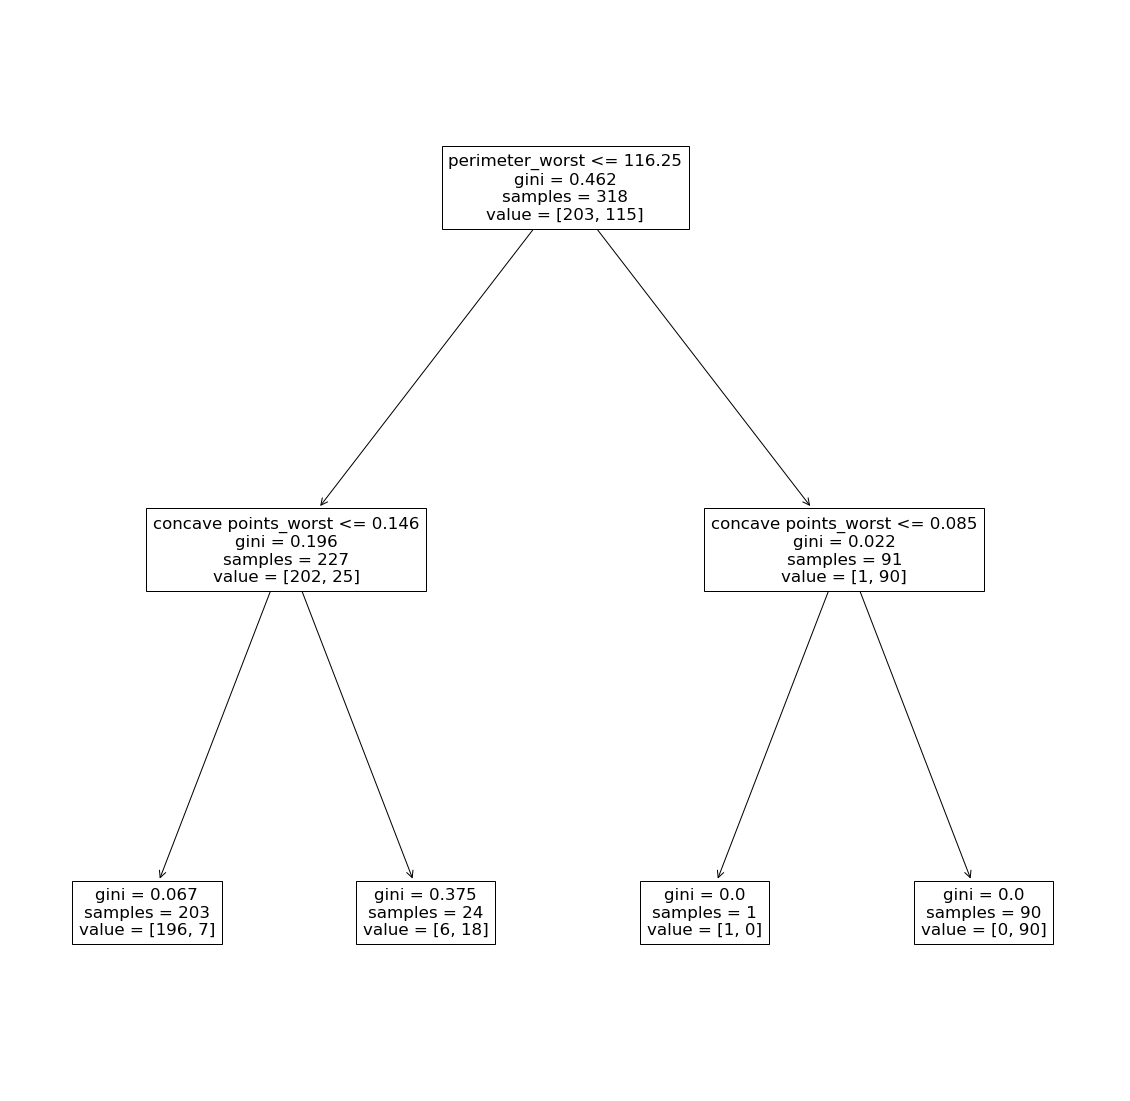

In [20]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

arvore_auxiliar = DecisionTreeClassifier(max_depth=2)

arvore_auxiliar.fit(X_train, y_train)

plt.figure(figsize=(20, 20))
plot_tree(arvore_auxiliar, feature_names=X_train.columns)
plt.show()

#### Resultados

1 - A acurácia, precisão e recall do seu modelo na base utilizada para treino e validação

In [21]:
print(f'Treino:\nAcc: {acc_train:.2f}, Precision: {prec_train:.2f}, Recall: {rec_train:.2f}')
print(f'Validação:\nAcc: {acc_valid:.2f}, Precision: {prec_valid:.2f}, Recall: {rec_valid:.2f}')

Treino:
Acc: 0.93, Precision: 0.97, Recall: 0.84
Validação:
Acc: 0.96, Precision: 0.98, Recall: 0.90


2 - A acurácia, precisão e recall do seu modelo na base breast_cancer_test.csv

In [22]:
df_cancer_test['diagnosis'] = df_cancer_test['diagnosis'].map({'M': 1, 'B': 0})

df_cancer_test.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.91,26.50,98.87,567.7,0.20980,0.86630,0.68690,0.25750,0.6638,0.17300
1,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.54,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
2,843786,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,15.47,23.75,103.40,741.6,0.17910,0.52490,0.53550,0.17410,0.3985,0.12440
3,846226,1,19.17,24.80,132.40,1123.0,0.09740,0.24580,0.20650,0.11180,...,20.96,29.94,151.70,1332.0,0.10370,0.39030,0.36390,0.17670,0.3176,0.10230
4,855133,1,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,...,14.99,25.20,95.54,698.8,0.09387,0.05131,0.02398,0.02899,0.1565,0.05504


In [23]:
df_cancer_test['predict'] = modelo.predict(df_cancer_test[X_train.columns])

In [25]:
acc_test = accuracy_score(df_cancer_test['diagnosis'], df_cancer_test['predict'])
prec_test = precision_score(df_cancer_test['diagnosis'], df_cancer_test['predict'])
rec_test = recall_score(df_cancer_test['diagnosis'], df_cancer_test['predict'])

print(f'Teste:\nAcc: {acc_test:.2f}, Precision: {prec_test:.2f}, Recall: {rec_test:.2f}')

Teste:
Acc: 0.89, Precision: 0.95, Recall: 0.78


3 - O K escolhido

Foi escolhido k=12.

4 - Qual é a variável mais importante no processo de decisão? Você pode usar uma árvore para responder

Baseado na árvore, a variável mais importante é a perimeter_worst.

## Exercício 2

Utilizando o dataset movies_data.csv, desenvolva um modelo que, dada a escolha de um filme, apresente uma sugestão com os 3 filmes mais parecidos.

**Dica**: adapte a classe KNN_Custom, vista na aula, para resolver esse problema.

In [26]:
df_movies = pd.read_csv('movies_data.csv')

df_movies.head()

,Movie Name,IMDB Rating,Biography,Drama,Thriller,Comedy,Crime,Mystery,History,Label
0,The Imitation Game,8.0,1,1,1,0,0,0,0,0
1,Ex Machina,7.7,0,1,0,0,0,1,0,0
2,A Beautiful Mind,8.2,1,1,0,0,0,0,0,0
3,Good Will Hunting,8.3,0,1,0,0,0,0,0,0
4,Forrest Gump,8.8,0,1,0,0,0,0,0,0


In [89]:
import numpy as np
from scipy import stats

# Definição da nossa classe

class KNN_Custom:
    
    def __init__(self, k, data):
        # Inicializando nosso modelo
        
        self._k = k + 1
        self._data = data.copy()
        
    def predict(self, movie, features):
        
        # Garantimos que estamos tratando uma array do numpy
        X = self._data.loc[self._data['Movie Name'] == movie, features].to_numpy().reshape(-1)
        
        # Criamos nossa tabela de distâncias
        self._dist_table = pd.DataFrame(columns=['sample_index', 'distance'])
        
        # Iteramos sobre todos os pontos
        for i in range(len(self._data)):
            # Selecionamos o ponto atual
            ponto_atual = self._data[features].iloc[i].to_numpy()
            
            # Calculamos a distância
            dist = np.linalg.norm(X-ponto_atual)
            
            # Adicionamos o valos à tabela
            self._dist_table = self._dist_table.append({'sample_index': i, 'distance': dist}, ignore_index=True)
        
        
        # Ordenamos a tabela pela distância
        self._dist_table = self._dist_table.sort_values('distance')
        
        # Selecionamos os índices com as K menores distâncias
        self._vetor_indices = self._dist_table.sort_values('distance')['sample_index'].to_numpy()[1:self._k]
        
        # Retornamos a moda das categorias selecionadas
        return self._data.loc[self._vetor_indices, 'Movie Name']
    
    def __repr__(self):
        return f'KNN implementado manualmente! K={self._k}'
            

In [90]:
modelo = KNN_Custom(k=3, data=df_movies)

In [91]:
features = df_movies.drop('Movie Name', axis=1).columns.to_list()
features

['IMDB Rating',
 'Biography',
 'Drama',
 'Thriller',
 'Comedy',
 'Crime',
 'Mystery',
 'History',
 'Label']

In [94]:
movie = 'Forrest Gump'

modelo.predict(movie, features)

12.0         Interstellar
3.0     Good Will Hunting
15.0            Inception
Name: Movie Name, dtype: object